In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hnc_n_multiscale import  HNC_solver

# Two Species

Here we do QSP interactions between electrons and one ion type. 

Using $\tilde{r}\equiv r/r_s$, we implement potentials 
\begin{align}
\beta v_{ee}(\tilde{r}) &=  \frac{\Gamma_{ee}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right) +  \ln2 \exp\left[-\tilde{r}^2 r_s^2/(\pi \Lambda_e^2 \ln 2)\right]\\
\beta v_{ei}(\tilde{r}) &=  \frac{\Gamma_{ei}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right)\\
\beta v_{ii}(\tilde{r}) &=  \frac{\Gamma_{ii}}{\tilde{r}}
\end{align}
For  
\begin{align}
\Gamma_{ee}&=\frac{\beta e^2}{r_s}\\
\Gamma_{ei}&=\frac{\beta Z_i e^2}{r_s}\\
\Gamma_{ii}&=\frac{\beta Z_i^2 e^2}{r_s}\\
\end{align}


### "Classical-Map  Hypernetted  Chain  Calculations  for  Dense Plasmas"
###### R. Bredow1∗, Th. Bornath1, W.-D. Kraeft1, M.W.C. Dharma-wardana,and R. Redmer1
[doi.org/10.1002/ctpp.201400080](https://doi.org/10.1002/ctpp.201400080)


### Simple Classical Mapping of the Spin-Polarized Quantum Electron Gas: Distribution Functions and Local-Field Corrections
###### M. W. C. Dharma-wardana and F. Perrot
[DOI:https://doi.org/10.1103/PhysRevLett.84.959](https://doi.org/10.1103/PhysRevLett.84.959)



Define physical constants

In [2]:
# k_B = 1.380649e-23  # Boltzmann constant [J/K]
# hbar=  6.62607015e-34 # Planck [J/s]
eV = 0.0367512 # So 4 eV = 4 * 0.036.. in natural units
Kelvin = 8.61732814974493e-5*eV #Similarly, 1 Kelvin = 3.167e-6... in natural units 
π = np.pi
# [AU]
rs  = 3
T   = 1*eV 
Zstar=1#

β   = 1/T
m_e = 1


Λe  = np.sqrt(  β*2*π /m_e )
Γee = β/rs 
Γei = -Zstar*β/rs 
Γii = Zstar**2*β/rs 
print(Γee, Γei, Γii)

9.069998621360211 -9.069998621360211 9.069998621360211


Plug into get potentials

In [3]:
def βvee(r):
#     return Γee/r*(1- np.exp(-r*rs/Λe))+ np.log(2) * np.exp(-r**2 * rs**2/( π*Λe**2*np.log(2)))
#     return Γee/r*(1- np.exp(-r*rs/Λe))+ np.log(2) * np.exp(-4*np.pi* r**2 * rs**2/( Λe**2))
    return  np.log(2) * np.exp(-4*np.pi* r**2 * rs**2/( Λe**2))
    

def βvei(r):
    return Γei/r*(1- np.exp(-r*rs/Λe))

def βvei_atomic(r):
    r_c = 3/5 #3/5 r_s in linear n_b(r) model
    return (Γei/r*np.heaviside(r - r_c,0.5)  )*  (1- np.exp(-r*rs/Λe))

# BAD SIMPLE
# def βvee(r):
#     return Γee/r


# def βvei(r):
#     return -Γei/r

def βvii(r):
    return Γii/r 

print(βvee(0.1), βvii(0.01))

0.6885769952884582 906.9998621360211


First, we initialize the hnc

# Electron Only

/home/zach/plasma/hnc/hnc_n_multiscale.py:388: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,10)


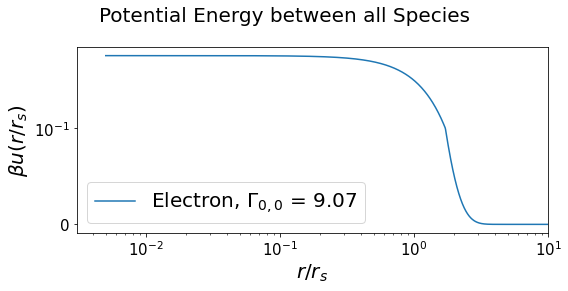

Err in c_r: 22.461
Err in c_r: 0.004
Err in c_r: 0.000
Err in c_r: 0.000


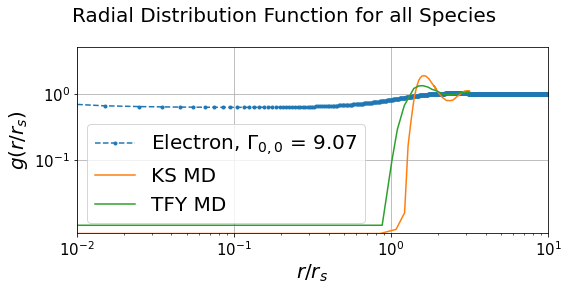

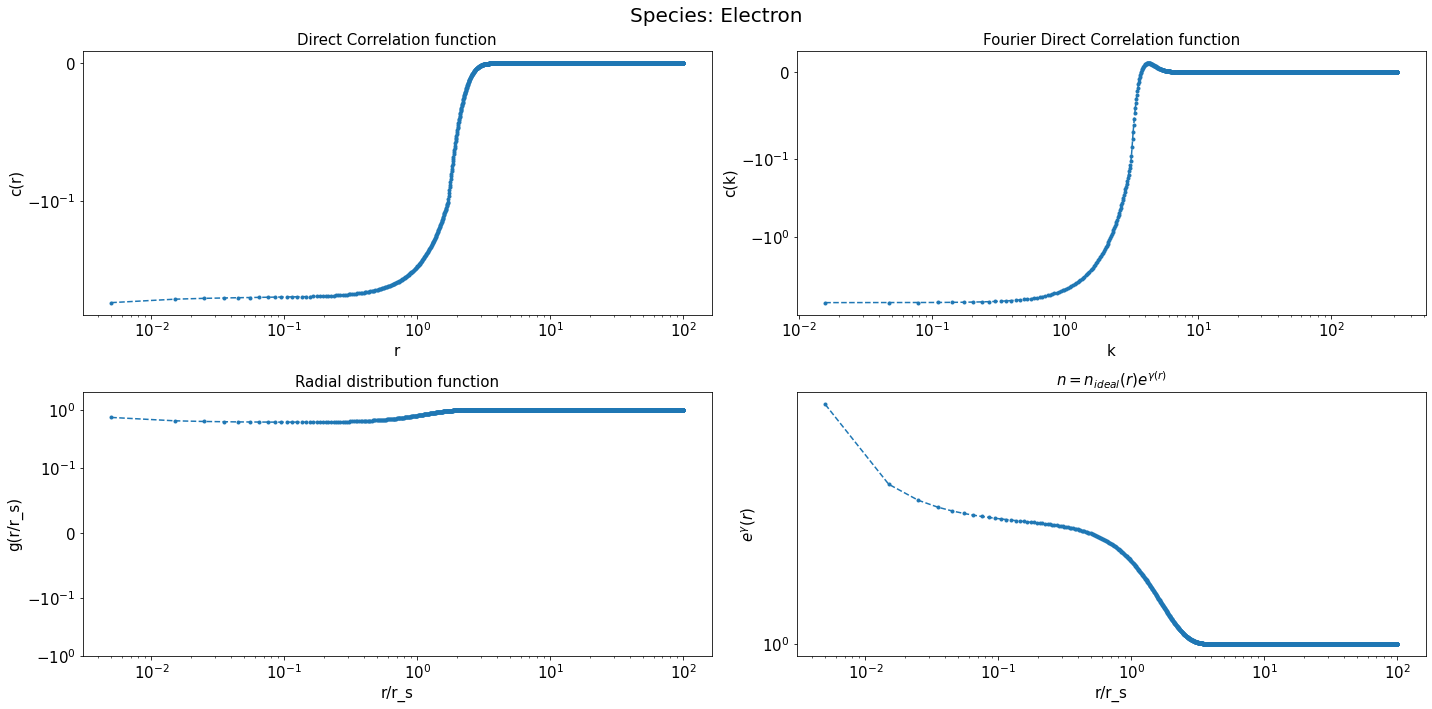

In [4]:
N_species = 1
Gamma = np.array(  [[Γee]])


names = ["Electron", ] 
kappa = 1
rho = np.array([  Zstar*3/(4*np.pi) ])
hnc = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-4,
                 kappa_multiscale=1, rho = rho, num_iterations=int(10e2), 
                 R_max=100, N_bins=10000, names=names)

hnc.βu_r_matrix[0,0] = βvee(hnc.r_array)
hnc.split_βu_matrix()
hnc.get_βu_k_matrices()
hnc.plot_βu_all_species()
hnc.HNC_solve(alpha=1)
gr_files = ["/home/zach/plasma/atomic_forces/data/RDF/Al_0.5eV_rs3_KS-MD.txt", "/home/zach/plasma/atomic_forces/data/RDF/Al_0.5eV_rs3_TFY-MD.txt"]
gr_labels= ["KS MD", "TFY MD"]
hnc.plot_g_all_species(data_to_compare=gr_files, data_names=gr_labels)
hnc.plot_species((0,0))

In [5]:
(hnc.h_r_matrix[0,0]+1)[:10]

array([0.74635651, 0.65310544, 0.63598566, 0.62888673, 0.62508653,
       0.62279536, 0.62133322, 0.62038514, 0.61978518, 0.61943763])

# Electron Ion

In [6]:
N_species = 2
Gamma = np.array(  [[Γii,  Γei],
                    [Γei,  Γee]])


# Gamma = np.array(  [[50,  10],
#                     [10,  10]])

names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc2 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-4,
                 kappa_multiscale=1, rho = rho, num_iterations=int(10e2), 
                 R_max=10, N_bins=1000, names=names)


then we create the potential matrix, βu_matrix 

In [7]:
hnc2.βu_r_matrix[0,0] = βvii(hnc2.r_array)
hnc2.βu_r_matrix[1,0] = βvei(hnc2.r_array)
hnc2.βu_r_matrix[0,1] = βvei(hnc2.r_array)
hnc2.βu_r_matrix[1,1] = βvee(hnc2.r_array)


hnc2.split_βu_matrix()
hnc2.get_βu_k_matrices()

# i, j = hnc2.i, hnc2.j
# c_k = np.zeros((hnc2.N_species, hnc2.N_species, hnc2.N_bins))
# # c_k[i, j] = -4 * np.pi * hnc2.Gamma[i, j, np.newaxis] / (hnc2.k_array**2 + hnc2.kappa**2)[np.newaxis,np.newaxis,:]
# c_k[1, 1] =  -4 * np.pi * hnc2.Gamma[1, 1, np.newaxis] / (hnc2.k_array**2 + 1**2)[np.newaxis,np.newaxis,:]
# c_k[0, 0] =  -4 * np.pi * hnc2.Gamma[0, 0, np.newaxis] / (hnc2.k_array**2 )[np.newaxis,np.newaxis,:]
# c_k[0, 1] =  -4 * np.pi * hnc2.Gamma[0, 1, np.newaxis] / (hnc2.k_array**2 + 1**2 )[np.newaxis,np.newaxis,:]
# c_k[1, 0] =  -4 * np.pi * hnc2.Gamma[1, 0, np.newaxis] / (hnc2.k_array**2 + 1**2)[np.newaxis,np.newaxis,:]
# hnc2.c_k_matrix = c_k
# hnc2.c_s_k_matrix = hnc2.c_k_matrix + hnc2.βu_l_k_matrix
# hnc2.c_s_r_matrix = hnc2.FT_k_2_r_matrix(hnc2.c_s_k_matrix)
# hnc2.initialize_C_matrix()

/home/zach/plasma/hnc/hnc_n_multiscale.py:388: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,10)


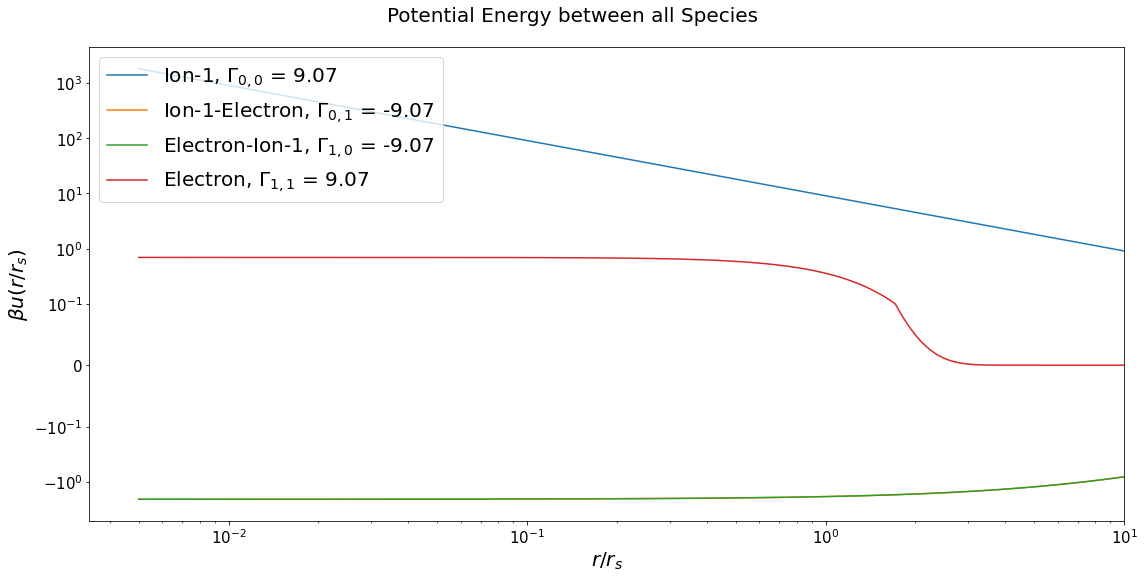

In [8]:
hnc2.plot_βu_all_species()

Err in c_r: 100.163
Err in c_r: 0.608
Err in c_r: 0.121
Err in c_r: 0.121
Err in c_r: 0.092
Err in c_r: 0.069
Err in c_r: 0.052
Err in c_r: 0.038
Err in c_r: 0.028
Err in c_r: 0.021
Err in c_r: 0.015
Err in c_r: 0.011
Err in c_r: 0.008
Err in c_r: 0.006
Err in c_r: 0.004
Err in c_r: 0.003
Err in c_r: 0.002
Err in c_r: 0.002
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.001
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000
Err in c_r: 0.000


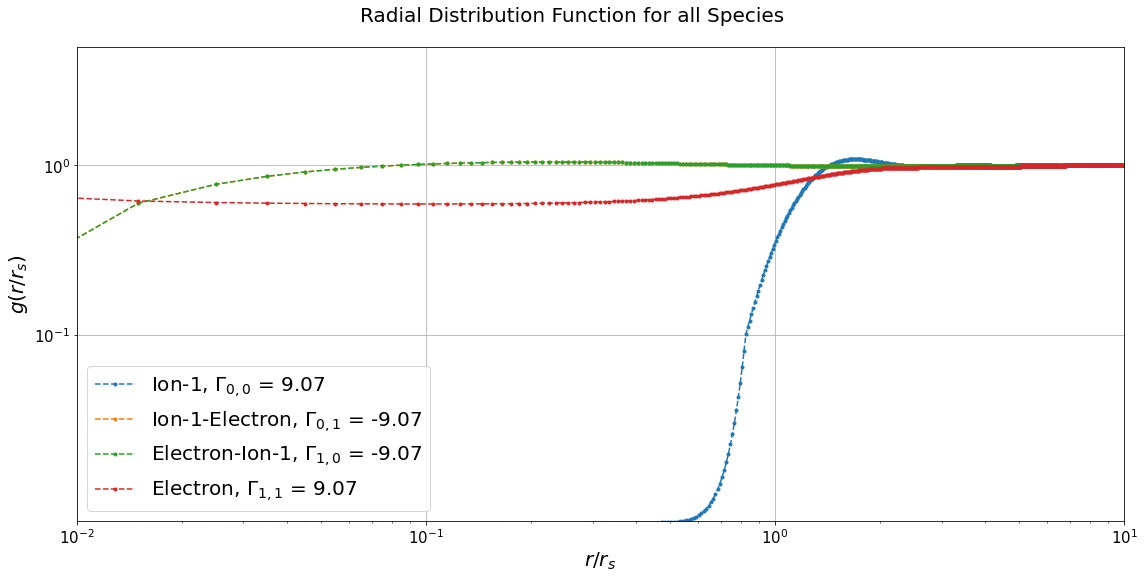

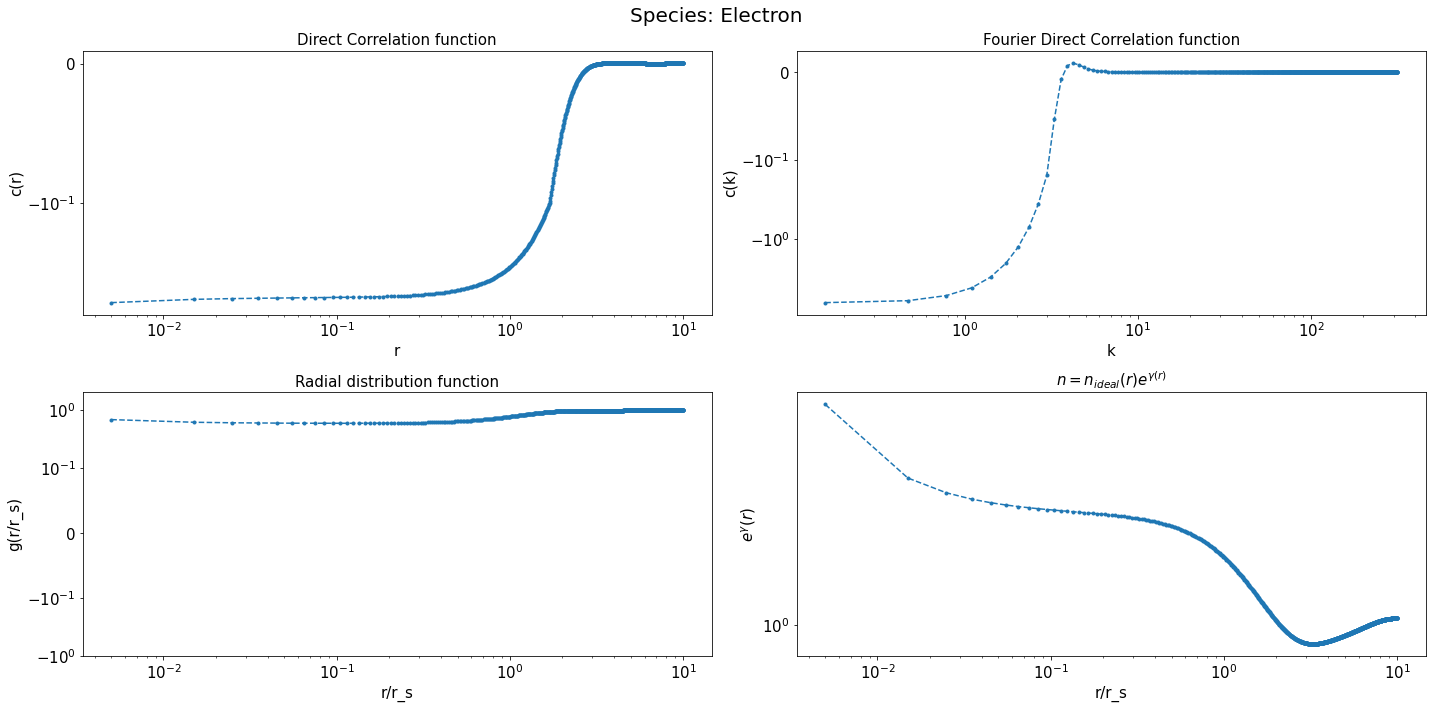

In [9]:
hnc2.HNC_solve(alpha=1)
hnc2.plot_g_all_species()
hnc2.plot_species((1,1))

In [10]:
hnc2.c_k_matrix[1,1]

array([-6.51393265e+00, -6.15408910e+00, -5.30090253e+00, -4.22915517e+00,
       -3.08648401e+00, -2.07450808e+00, -1.27929239e+00, -7.18194171e-01,
       -3.61611643e-01, -1.57692579e-01, -5.39306938e-02, -8.28013018e-03,
        7.57163592e-03,  1.03442074e-02,  8.53382680e-03,  5.93188076e-03,
        3.79404442e-03,  2.38553148e-03,  1.54089786e-03,  1.08738089e-03,
        8.41486674e-04,  7.17912090e-04,  6.39854586e-04,  5.91777837e-04,
        5.47016937e-04,  5.11751167e-04,  4.74319305e-04,  4.43488042e-04,
        4.11357711e-04,  3.85149195e-04,  3.58360053e-04,  3.36638459e-04,
        3.14526310e-04,  2.96574002e-04,  2.78233223e-04,  2.63277533e-04,
        2.47913456e-04,  2.35324135e-04,  2.22322150e-04,  2.11620621e-04,
        2.00516497e-04,  1.91340624e-04,  1.81780261e-04,  1.73851896e-04,
        1.65560838e-04,  1.58662922e-04,  1.51425378e-04,  1.45386256e-04,
        1.39030530e-04,  1.33712937e-04,  1.28101000e-04,  1.23394095e-04,
        1.18413956e-04,  

In [11]:
hnc2.invert_matrix(hnc2.I[:,:,np.newaxis] - hnc2.C_matrix)[1,1]

array([-1.71421245e-03, -2.52918716e+00,  5.72262986e-01,  5.00269731e-01,
        5.85050496e-01,  6.68834456e-01,  7.68981156e-01,  8.53651071e-01,
        9.21827707e-01,  9.63767446e-01,  9.87844190e-01,  9.98075962e-01,
        1.00202715e+00,  1.00250850e+00,  1.00212231e+00,  1.00143727e+00,
        1.00093805e+00,  1.00058080e+00,  1.00038131e+00,  1.00026622e+00,
        1.00020708e+00,  1.00017554e+00,  1.00015584e+00,  1.00014401e+00,
        1.00013223e+00,  1.00012404e+00,  1.00011415e+00,  1.00010718e+00,
        1.00009873e+00,  1.00009289e+00,  1.00008586e+00,  1.00008105e+00,
        1.00007528e+00,  1.00007131e+00,  1.00006654e+00,  1.00006324e+00,
        1.00005926e+00,  1.00005647e+00,  1.00005312e+00,  1.00005075e+00,
        1.00004790e+00,  1.00004586e+00,  1.00004342e+00,  1.00004165e+00,
        1.00003954e+00,  1.00003799e+00,  1.00003616e+00,  1.00003480e+00,
        1.00003320e+00,  1.00003200e+00,  1.00003059e+00,  1.00002952e+00,
        1.00002827e+00,  

In [12]:
hnc2.h_r_matrix[1,1]

array([-3.15370059e-01, -3.83416043e-01, -3.96110326e-01, -4.01373937e-01,
       -4.04173245e-01, -4.05837323e-01, -4.06872476e-01, -4.07513602e-01,
       -4.07884575e-01, -4.08056931e-01, -4.08074882e-01, -4.07967244e-01,
       -4.07753619e-01, -4.07447818e-01, -4.07059871e-01, -4.06597248e-01,
       -4.06065643e-01, -4.05469486e-01, -4.04812286e-01, -4.04096869e-01,
       -4.03325552e-01, -4.02500260e-01, -4.01622616e-01, -4.00694010e-01,
       -3.99715646e-01, -3.98688584e-01, -3.97613763e-01, -3.96492034e-01,
       -3.95324168e-01, -3.94110880e-01, -3.92852833e-01, -3.91550651e-01,
       -3.90204930e-01, -3.88816237e-01, -3.87385121e-01, -3.85912117e-01,
       -3.84397746e-01, -3.82842521e-01, -3.81246952e-01, -3.79611541e-01,
       -3.77936791e-01, -3.76223205e-01, -3.74471286e-01, -3.72681541e-01,
       -3.70854478e-01, -3.68990613e-01, -3.67090466e-01, -3.65154560e-01,
       -3.63183429e-01, -3.61177612e-01, -3.59137654e-01, -3.57064111e-01,
       -3.54957544e-01, -

In [13]:
hnc2.c_s_k_matrix[1,1]

array([-1.46338085e+00, -1.52213133e+00, -1.41169280e+00, -1.25166534e+00,
       -1.02494695e+00, -8.04830283e-01, -6.09534788e-01, -4.47690943e-01,
       -3.21394124e-01, -2.27408605e-01, -1.60252224e-01, -1.13667937e-01,
       -8.19853370e-02, -6.04596905e-02, -4.56591216e-02, -3.51652034e-02,
       -2.75061096e-02, -2.17250393e-02, -1.72952148e-02, -1.38413532e-02,
       -1.11513865e-02, -9.03523408e-03, -7.37940298e-03, -6.06696906e-03,
       -5.03110134e-03, -4.19856193e-03, -3.53214515e-03, -2.98694059e-03,
       -2.54374796e-03, -2.17477325e-03, -1.87072267e-03, -1.61369303e-03,
       -1.39954367e-03, -1.21613949e-03, -1.06198654e-03, -9.28461186e-04,
       -8.15436258e-04, -7.16538306e-04, -6.32342670e-04, -5.57985131e-04,
       -4.94387582e-04, -4.37736725e-04, -3.89105447e-04, -3.45435520e-04,
       -3.07842532e-04, -2.73825702e-04, -2.44484054e-04, -2.17738365e-04,
       -1.94639881e-04, -1.73435056e-04, -1.55112302e-04, -1.38174484e-04,
       -1.23541411e-04, -

In [14]:
(hnc2.A_times_B(hnc2.C_matrix, hnc2.c_s_k_matrix ) -  0*hnc2.βu_l_k_matrix )[1,1]

array([ 2.98406030e+04,  5.13674407e+02,  8.03228923e+01,  5.73692000e+00,
        3.81159846e+00,  4.88510503e-01,  4.77054778e-01,  6.77961924e-02,
        7.42177803e-02,  3.53787337e-03,  1.24719542e-02, -1.79255188e-03,
        2.79922615e-03, -9.85521854e-04,  8.96206624e-04, -4.22169080e-04,
        3.52209634e-04, -1.90407039e-04,  1.52271410e-04, -9.42248671e-05,
        6.98884789e-05, -5.02262078e-05,  3.37945654e-05, -2.82165778e-05,
        1.71445894e-05, -1.64955054e-05,  9.07139816e-06, -9.96577601e-06,
        4.97356488e-06, -6.19327306e-06,  2.80900798e-06, -3.94406440e-06,
        1.62613591e-06, -2.56532038e-06,  9.60775502e-07, -1.69916874e-06,
        5.77179490e-07, -1.14310888e-06,  3.51339355e-07, -7.79216199e-07,
        2.15997134e-07, -5.37009891e-07,  1.33680323e-07, -3.73365171e-07,
        8.30093370e-08, -2.61330257e-07,  5.15269315e-08, -1.83734688e-07,
        3.18382156e-08, -1.29447219e-07,  1.94806700e-08, -9.11363315e-08,
        1.17221936e-08, -

In [15]:
hnc2.get_γs_k_matrix()
hnc2.γs_r_matrix = hnc2.FT_k_2_r_matrix(hnc2.γs_k_matrix)
np.exp(hnc2.γs_r_matrix[1,1])

array([1.36451632, 1.220382  , 1.18695239, 1.16841171, 1.15483044,
       1.1435516 , 1.13356324, 1.12439601, 1.11580249, 1.10763986,
       1.09981989, 1.09228509, 1.08499633, 1.07792603, 1.07105413,
       1.06436566, 1.05784916, 1.05149566, 1.04529802, 1.03925041,
       1.03334802, 1.0275868 , 1.02196326, 1.01647438, 1.01111748,
       1.00589018, 1.00079029, 0.99581581, 0.99096489, 0.98623579,
       0.98162685, 0.97713648, 0.97276319, 0.96850548, 0.96436195,
       0.96033118, 0.95641181, 0.95260249, 0.94890188, 0.94530868,
       0.94182158, 0.93843927, 0.93516047, 0.9319839 , 0.92890828,
       0.92593233, 0.92305478, 0.92027437, 0.91758982, 0.91499986,
       0.91250325, 0.9100987 , 0.90778496, 0.90556077, 0.90342486,
       0.90137597, 0.89941284, 0.89753422, 0.89573884, 0.89402545,
       0.89239279, 0.8908396 , 0.88936462, 0.88796661, 0.88664431,
       0.88539646, 0.88422182, 0.88311914, 0.88208717, 0.88112466,
       0.88023038, 0.87940307, 0.87864151, 0.87794444, 0.87731